# Chain of Responsability


## O que é?

O padrao _Chain of Responsibility_, é caracterisado por uma sequencia de objetos que recebe uma requisição, tenta lidar com ela e, caso não consiga, delegue para o proximo objeto na corrente. Dessa forma o cliente possui uma referencia ao ponto de entrada da corrente e sabe que, ao enviar uma requisição a ele, que algum elo dessa corrente vai lidar com ela.

## Por quê?

O _Chain of Responsibility_ tem como objetivo a separacao entre o objeto que envia uma requisição e o objeto que a executa, dando a chance que mais de um objeto possa tentar executar essa requisicao. Esse pattern considera que a requisição eventualmente sera encaminhada ao objeto correto, isso permite que o objeto que envia a requisição não possua nenhuma referencia direta ao objeto que ira executa-la.

## Uso:

Voce deve usar o _Chain of Responsibility_ quando:
- Mais de um objeto pode lidar com a requisição e não se sabe previament qual eh o correto.
- Os possiveis objetos que irão lidar com a requisicao precisam ser definidos dinamicamente / at run time 
- Voce quer enviar uma requisição a um objeto generico sem especificar exatamente quem eh responsavel por lidar com ela

## Estrutura: 

![struct](https://upload.wikimedia.org/wikipedia/commons/6/6a/W3sDesign_Chain_of_Responsibility_Design_Pattern_UML.jpg)

## Exemplo:

Um exemplo simples do uso do _Chain of Responsibility_ eh uma calculadora. Cada vez que voce usa uma calculadora voce envia uma requisição de um calculo, um objeto composto por dois numeros e uma operacao, esse calculo pode ser executado por diversos objetos (dependendo da operacao desejada)
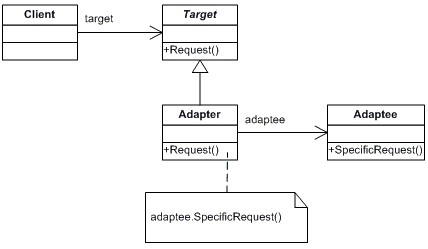

In [10]:
from __future__ import annotations
from abc import ABCMeta, abstractmethod


class Calc(object):
    num1 = 0
    num2 = 0
    operation = ""

    def __init__(self, num1: int, num2: int, operation: str) -> None:
        self.num1 = num1
        self.num2 = num2
        self.operation = operation

    def num1(self) -> int:
        return self.num1

    def num2(self) -> int:
        return self.num2

    def operation(self) -> str:
        return self.operation




class Calculator(object):
    __metaclass__ = ABCMeta
    next = None

    def __init__(self) -> None:
        return

    def set_next(self, next_calculator: self.__class__):
        """Set next responsible calculator in the chain.
        """
        self.next = next_calculator
        return self.next

    @abstractmethod
    def calculate(self, op: Calc) -> int:
        """Abstract method to calculate.
        """
        raise NotImplementedError("You should implement this method.")

class Adder(Calculator):
    def calculate(self, op: Calc) -> int:
        """Abstract method to calculate.
        """
        if op.operation == "add":
            res = op.num1 + op.num2
            print(f"{op.num1} + {op.num2} = {res}")
            return res
        
        if self.next != None:
            return self.next.calculate(op)
        
        print("No more calculators to try")

class Multiplier(Calculator):
    def calculate(self, op: Calc) -> int:
        """Abstract method to calculate.
        """
        if op.operation == "mult":
            res = op.num1 * op.num2
            print(f"{op.num1} * {op.num2} = {res}")
            return res
        
        if self.next != None:
            return self.next.calculate(op)
        
        print("No more calculators to try")

class Divider(Calculator):
    def calculate(self, op: Calc) -> int:
        """Abstract method to calculate.
        """
        if op.operation == "div":
            res = op.num1 / op.num2
            print(f"{op.num1} / {op.num2} = {res}")
            return res
        
        if self.next != None:
            return self.next.calculate(op)
        
        print("No more calculators to try")

class Subtractor(Calculator):
    def calculate(self, op: Calc) -> int:
        """Abstract method to calculate.
        """
        if op.operation == "sub":
            res = op.num1 - op.num2
            print(f"{op.num1} - {op.num2} = {res}")
            return res
        
        if self.next != None:
            return self.next.calculate(op)
        
        print("No more calculators to try")

def calculatorFactory() -> Calculator:
    add = Adder()
    sub = Subtractor()
    div = Divider()
    mult = Multiplier()

    div.set_next(mult)
    sub.set_next(div)
    add.set_next(sub)
    
    return add

def client_code(calculator: Calculator) -> None:

    # ...

    op = Calc(2, 5, "add")
    calculator.calculate(op)

    op = Calc(5, 5, "sub")
    calculator.calculate(op)

    op = Calc(2, 5, "mult")
    calculator.calculate(op)

    op = Calc(8, 4, "div")
    calculator.calculate(op)

    op = Calc(8, 4, "bla")
    calculator.calculate(op)

    # ...


if __name__ == "__main__":
    
    calculator = calculatorFactory()
    client_code(calculator)


2 + 5 = 7
5 - 5 = 0
2 * 5 = 10
8 / 4 = 2.0
No more calculators to try


## Prós e contras:

### Prós

- Desassocia o cliente fazendo a requisicao dos objetos que vao executar essa requisicao
- Permite definir os objetos handlers on run time
- Permite que voce adicione novos handlers sem que o cliente saiba

### Contras

- Torna a execussao da request obscura, o cliente nao tem nocao de quem vai executar (o que deixa o codigo mais complicado de entender)
- Necessita de um set up para montar a corrente (uma factory)
- Nada garante que existira um objeto para lidar com aquela requisicao


## Discussao:

1. Como o _Chain of Responsibility_ se difere do _Decorator_ pattern ou de uma _Linked List_? Como podemos implementa-lo unsando _Composite_?

2. (Bônus):  _Is it helpful to look at patterns from a structural perspective? In other words, if you see how a set of patterns are the same in terms of how they are programmed, does that help you to understand when to apply them to a design?_